# Visual Analysis of Infant Mortality in the Balkan Region: Trends, Patterns, and Implications.

1 Visualization of the trend of infant mortality rate in the Balkan region over the years. 

2 Visualization and comparing the infant mortality rates for males and females in the Balkan region. 

3 Exploring Deviation in Mortality Rates: The dataset includes information on the deviation in infant mortality rates. 


In [218]:
# import the preliminary modules:

In [38]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


This project utilizes the WHO database as the data source for analyzing infant mortality in the Balkan region:
Database: Infant deaths and mortality rate (between birth and 11 months) European region data by country (https://apps.who.int/gho/data/view.main.CHILDMORTINFANTEURv?lang=en)

In [14]:
#load date into csv file
infant_mortality = pd.read_csv("Infant deaths and mortality rate (between birth and 11 months).csv")
#analizing the data
print(infant_mortality.head(5))
print(infant_mortality.columns)

                         Unnamed: 0 Unnamed: 1  \
0  Countries, territories and areas       Year   
1                           Albania       2021   
2                           Albania       2020   
3                           Albania       2019   
4                           Albania       2018   

  Infant mortality rate (between birth and 11 months per 1000 live births)  \
0                                         Both sexes                         
1                                   8.41 [7.76-9.12]                         
2                                   8.39 [7.89-8.92]                         
3                                   8.35 [7.95-8.77]                         
4                                   8.31 [7.97-8.67]                         

  Infant mortality rate (between birth and 11 months per 1000 live births).1  \
0                                               Male                           
1                                  9.23 [8.47-10.06]                  

In [15]:
#prepare the dataset for using
#check unique countries
print(infant_mortality['Unnamed: 0'].unique())

['Countries, territories and areas' 'Albania' 'Andorra' 'Armenia'
 'Austria' 'Azerbaijan' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Kazakhstan' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Monaco' 'Montenegro' 'Netherlands' 'Norway'
 'Poland' 'Portugal' 'Republic of Moldova' 'North Macedonia' 'Romania'
 'Russian Federation' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Tajikistan' 'Türkiye' 'Turkmenistan' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland' 'Uzbekistan']


In [16]:
#filter only Balkan countries
infant_mortality_blk = infant_mortality[(infant_mortality['Unnamed: 0'] == 'Bosnia and Herzegovina')\
                                        |(infant_mortality['Unnamed: 0'] == 'Croatia')\
                                        |(infant_mortality['Unnamed: 0'] == 'Montenegro')\
                                        |(infant_mortality['Unnamed: 0'] == 'Serbia')\
                                       |(infant_mortality['Unnamed: 0'] == 'North Macedonia')\
                                       |(infant_mortality['Unnamed: 0'] == 'Slovenia')]

In [17]:
#rename columns
infant_mortality_blk = infant_mortality_blk.rename(columns={
    "Unnamed: 0": "country",
    "Unnamed: 1": "year",
    "Infant mortality rate (between birth and 11 months per 1000 live births)": "imr_both_sexes_per_1000",
    "Infant mortality rate (between birth and 11 months per 1000 live births).1": "imr_male_per_1000",
    "Infant mortality rate (between birth and 11 months per 1000 live births).2": "imr_female_per_1000"
})
#drop columns'Number of infant deaths' 
columns_to_drop = ['Number of infant deaths (between birth and 11 months)',
                   'Number of infant deaths (between birth and 11 months).1',
                   'Number of infant deaths (between birth and 11 months).2']

infant_mortality_blk.drop(columns=infant_mortality_blk.loc[:, columns_to_drop], inplace=True)


In [18]:
# years matching check
print(infant_mortality_blk['year'].unique())

['2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012'
 '2011' '2010' '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002'
 '2001' '2000' '1999' '1998' '1997' '1996' '1995' '1994' '1993' '1992'
 '1991' '1990' '1989' '1988' '1987' '1986' '1985' '1984' '1983' '1982'
 '1981']


In [19]:
# years matching check
years_by_country = infant_mortality_blk.groupby('country')['year'].nunique()
print(years_by_country)

country
Bosnia and Herzegovina    38
Croatia                   41
Montenegro                38
North Macedonia           41
Serbia                    38
Slovenia                  41
Name: year, dtype: int64


In [20]:
#check the availability of years that are common across all countries in the 'infant_mortality_blk' dataset
# Step 1: obtain a list of years that are common to all countries
common_years = infant_mortality_blk.groupby('year')['country'].nunique()
common_years = common_years[common_years == infant_mortality_blk['country'].nunique()].index.tolist()

# Step 2: filter the DataFrame to retain only the rows with years present in the list of common years
filtered_df = infant_mortality_blk[infant_mortality_blk['year'].isin(common_years)]

print(filtered_df)


                     country  year imr_both_sexes_per_1000  \
356   Bosnia and Herzegovina  2021         4.84 [3.77-6.2]   
357   Bosnia and Herzegovina  2020         4.97 [4.03-6.1]   
358   Bosnia and Herzegovina  2019         5.09 [4.3-6.02]   
359   Bosnia and Herzegovina  2018        5.19 [4.55-5.93]   
360   Bosnia and Herzegovina  2017        5.29 [4.76-5.85]   
...                      ...   ...                     ...   
2462                Slovenia  1988      10.07 [9.73-10.45]   
2463                Slovenia  1987     10.78 [10.43-11.19]   
2464                Slovenia  1986     11.52 [11.14-11.96]   
2465                Slovenia  1985     12.27 [11.86-12.72]   
2466                Slovenia  1984     13.02 [12.57-13.49]   

        imr_male_per_1000  imr_female_per_1000  
356       5.3 [4.09-6.77]     4.38 [3.37-5.59]  
357      5.44 [4.37-6.69]       4.48 [3.6-5.5]  
358      5.56 [4.65-6.59]     4.59 [3.84-5.43]  
359      5.68 [4.93-6.51]     4.68 [4.06-5.36]  
360      5

In [21]:
# clean the 'imr_both_sexes_per_1000' column to remove any non-numeric characters
filtered_df['imr_both_sexes_per_1000'] = filtered_df['imr_both_sexes_per_1000'].str.replace('[', '')
filtered_df['imr_both_sexes_per_1000'] = filtered_df['imr_both_sexes_per_1000'].str.replace(']', '')

# split the 'imr_both_sexes_per_1000' column into medium and deviation columns
split_data = filtered_df['imr_both_sexes_per_1000'].str.split(' ', expand=True)

# use .loc to assign values to new columns
filtered_df.loc[:, 'imr_both_sexes_per_1000_mean'] = pd.to_numeric(split_data.loc[:, 0])

# strip the square brackets from the deviation column and convert to numeric values
filtered_df.loc[:, 'imr_both_sexes_per_1000_deviation_lower_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[0])
filtered_df.loc[:, 'imr_both_sexes_per_1000_deviation_upper_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[1])

# drop the original 'imr_both_sexes_per_1000' column
filtered_df.drop(columns=['imr_both_sexes_per_1000'], inplace=True)

print(filtered_df)


                     country  year    imr_male_per_1000  imr_female_per_1000  \
356   Bosnia and Herzegovina  2021      5.3 [4.09-6.77]     4.38 [3.37-5.59]   
357   Bosnia and Herzegovina  2020     5.44 [4.37-6.69]       4.48 [3.6-5.5]   
358   Bosnia and Herzegovina  2019     5.56 [4.65-6.59]     4.59 [3.84-5.43]   
359   Bosnia and Herzegovina  2018     5.68 [4.93-6.51]     4.68 [4.06-5.36]   
360   Bosnia and Herzegovina  2017     5.78 [5.17-6.43]     4.75 [4.25-5.31]   
...                      ...   ...                  ...                  ...   
2462                Slovenia  1988  11.19 [10.73-11.69]     8.88 [8.47-9.33]   
2463                Slovenia  1987      12 [11.5-12.54]      9.5 [9.06-9.99]   
2464                Slovenia  1986  12.83 [12.31-13.44]   10.13 [9.66-10.64]   
2465                Slovenia  1985  13.68 [13.12-14.29]  10.79 [10.28-11.31]   
2466                Slovenia  1984  14.51 [13.91-15.14]  11.46 [10.92-12.01]   

      imr_both_sexes_per_1000_mean  \
3

In [22]:
# clean the 'imr_male_per_1000' column to remove any non-numeric characters
filtered_df['imr_male_per_1000'] = filtered_df['imr_male_per_1000'].str.replace('[', '')
filtered_df['imr_male_per_1000'] = filtered_df['imr_male_per_1000'].str.replace(']', '')

# split the 'imr_male_per_1000' column into medium and deviation columns
split_data = filtered_df['imr_male_per_1000'].str.split(' ', expand=True)

# use .loc to assign values to new columns
filtered_df.loc[:, 'imr_male_per_1000_mean'] = pd.to_numeric(split_data.loc[:, 0])

# strip the square brackets from the deviation column and convert to numeric values
filtered_df.loc[:, 'imr_male_per_1000_deviation_lower_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[0])
filtered_df.loc[:, 'imr_male_per_1000_deviation_upper_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[1])

# drop the original 'imr_both_sexes_per_1000' column
filtered_df.drop(columns=['imr_male_per_1000'], inplace=True)

print(filtered_df)

                     country  year  imr_female_per_1000  \
356   Bosnia and Herzegovina  2021     4.38 [3.37-5.59]   
357   Bosnia and Herzegovina  2020       4.48 [3.6-5.5]   
358   Bosnia and Herzegovina  2019     4.59 [3.84-5.43]   
359   Bosnia and Herzegovina  2018     4.68 [4.06-5.36]   
360   Bosnia and Herzegovina  2017     4.75 [4.25-5.31]   
...                      ...   ...                  ...   
2462                Slovenia  1988     8.88 [8.47-9.33]   
2463                Slovenia  1987      9.5 [9.06-9.99]   
2464                Slovenia  1986   10.13 [9.66-10.64]   
2465                Slovenia  1985  10.79 [10.28-11.31]   
2466                Slovenia  1984  11.46 [10.92-12.01]   

      imr_both_sexes_per_1000_mean  \
356                           4.84   
357                           4.97   
358                           5.09   
359                           5.19   
360                           5.29   
...                            ...   
2462                     

In [23]:
# clean the 'imr_female_per_1000' column to remove any non-numeric characters
filtered_df['imr_female_per_1000'] = filtered_df['imr_female_per_1000'].str.replace('[', '')
filtered_df['imr_female_per_1000'] = filtered_df['imr_female_per_1000'].str.replace(']', '')

# split the 'imr_female_per_1000' column into medium and deviation columns
split_data = filtered_df['imr_female_per_1000'].str.split(' ', expand=True)

# use .loc to assign values to new columns
filtered_df.loc[:, 'imr_female_per_1000_mean'] = pd.to_numeric(split_data.loc[:, 0])

# strip the square brackets from the deviation column and convert to numeric values
filtered_df.loc[:, 'imr_female_per_1000_deviation_lower_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[0])
filtered_df.loc[:, 'imr_female_per_1000_deviation_upper_bound'] = pd.to_numeric(split_data.loc[:, 1].str.split('-', expand=True)[1])

# drop the original 'imr_female_per_1000' column
filtered_df.drop(columns=['imr_female_per_1000'], inplace=True)

print(filtered_df)

                     country  year  imr_both_sexes_per_1000_mean  \
356   Bosnia and Herzegovina  2021                          4.84   
357   Bosnia and Herzegovina  2020                          4.97   
358   Bosnia and Herzegovina  2019                          5.09   
359   Bosnia and Herzegovina  2018                          5.19   
360   Bosnia and Herzegovina  2017                          5.29   
...                      ...   ...                           ...   
2462                Slovenia  1988                         10.07   
2463                Slovenia  1987                         10.78   
2464                Slovenia  1986                         11.52   
2465                Slovenia  1985                         12.27   
2466                Slovenia  1984                         13.02   

      imr_both_sexes_per_1000_deviation_lower_bound  \
356                                            3.77   
357                                            4.03   
358               

# 1 Trend of Infant Mortality Rate over Time: 
Visualization of the trend of infant mortality rate in the Balkan region over the years. 

In [24]:
#create line plots to observe any increasing or decreasing trends in the overall infant mortality rate.
#sort data by countries
bosnia_data = filtered_df[filtered_df['country'] == 'Bosnia and Herzegovina']
croatia_data = filtered_df[filtered_df['country'] == 'Croatia']
montenegro_data = filtered_df[filtered_df['country'] == 'Montenegro']
macedonia_data = filtered_df[filtered_df['country'] == 'North Macedonia']
serbia_data = filtered_df[filtered_df['country'] == 'Serbia']
slovenia_data = filtered_df[filtered_df['country'] == 'Slovenia']

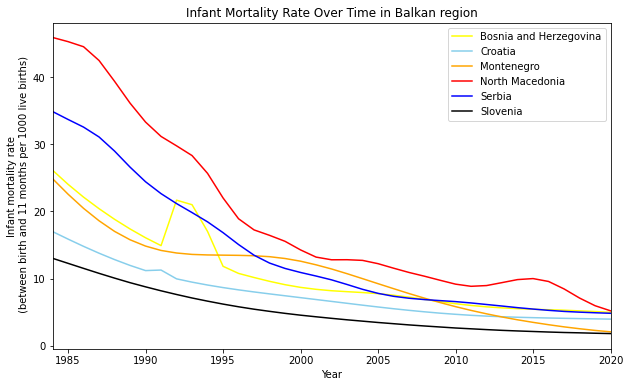

In [25]:

# define the datasets and colors
datasets = [
    ('Bosnia and Herzegovina', bosnia_data),
    ('Croatia', croatia_data),
    ('Montenegro', montenegro_data),
    ('North Macedonia', macedonia_data),
    ('Serbia', serbia_data),
    ('Slovenia', slovenia_data)
]

colors = ['yellow', 'skyblue', 'orange', 'red', 'blue', 'black']
# Convert the 'year' column to numeric
for dataset in datasets:
    dataset[1]['year'] = pd.to_numeric(dataset[1]['year'])
    
fig, ax = plt.subplots(figsize=(10, 6))

for i, data in enumerate(datasets):
    sns.lineplot(x='year', y='imr_both_sexes_per_1000_mean', data=data[1], ax=ax, color=colors[i], label=data[0])
    
   
plt.xlabel('Year')
plt.ylabel("Infant mortality rate\n (between birth and 11 months per 1000 live births)")
plt.title('Infant Mortality Rate Over Time in Balkan region')


# Set x-axis limits to show years from 1984 to 2020
plt.xlim(1984, 2020)

# Get the handles and labels of the current axes
handles, labels = ax.get_legend_handles_labels()

# Set the updated handles and labels for the legend
ax.legend(handles, labels)

plt.show()


# 2 Visualization and comparing the infant mortality rates for males and females in the Balkan region.

<Figure size 432x288 with 0 Axes>

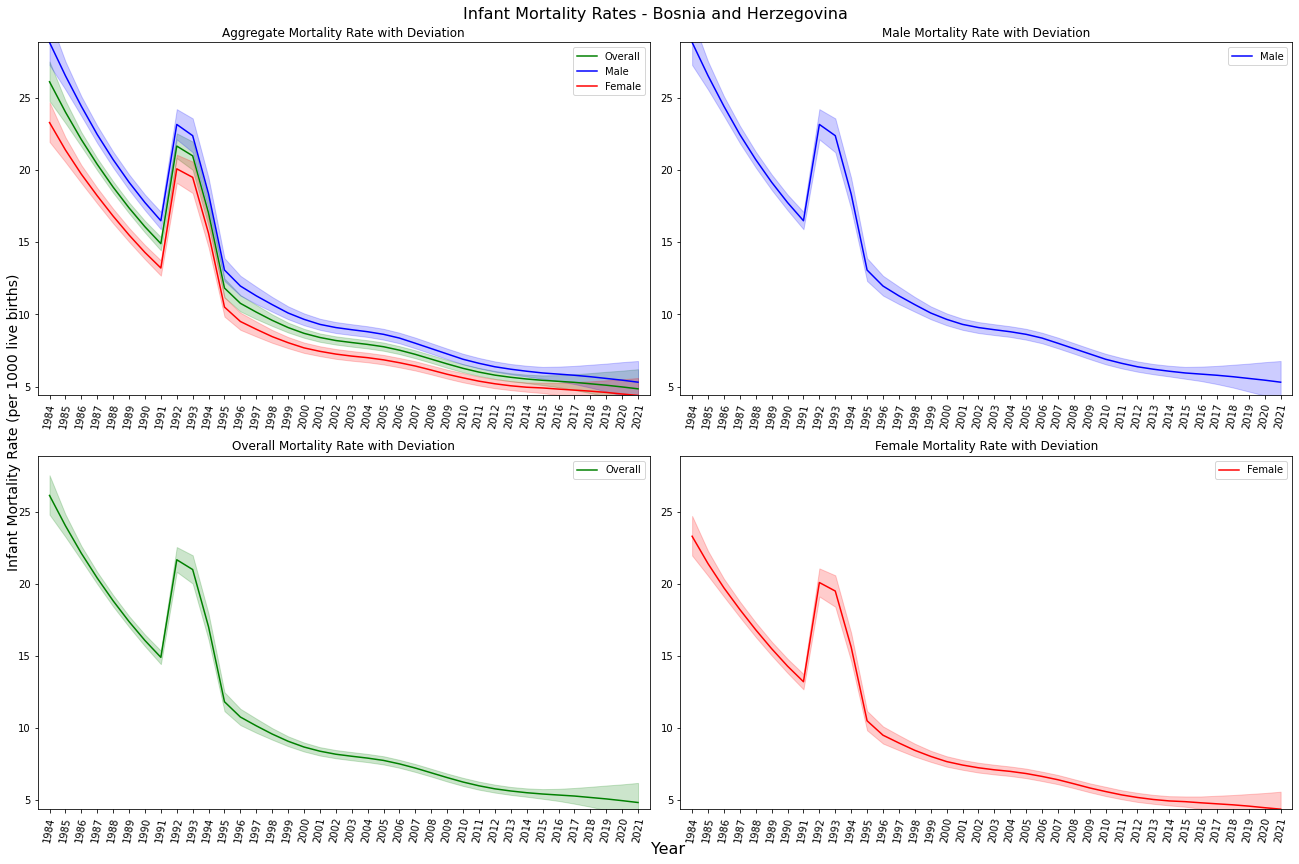

In [26]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(bosnia_data['year'])
overall_mortality = bosnia_data['imr_both_sexes_per_1000_mean']
male_mortality = bosnia_data['imr_male_per_1000_mean']
female_mortality = bosnia_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = bosnia_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = bosnia_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = bosnia_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = bosnia_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = bosnia_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = bosnia_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - Bosnia and Herzegovina', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



<Figure size 432x288 with 0 Axes>

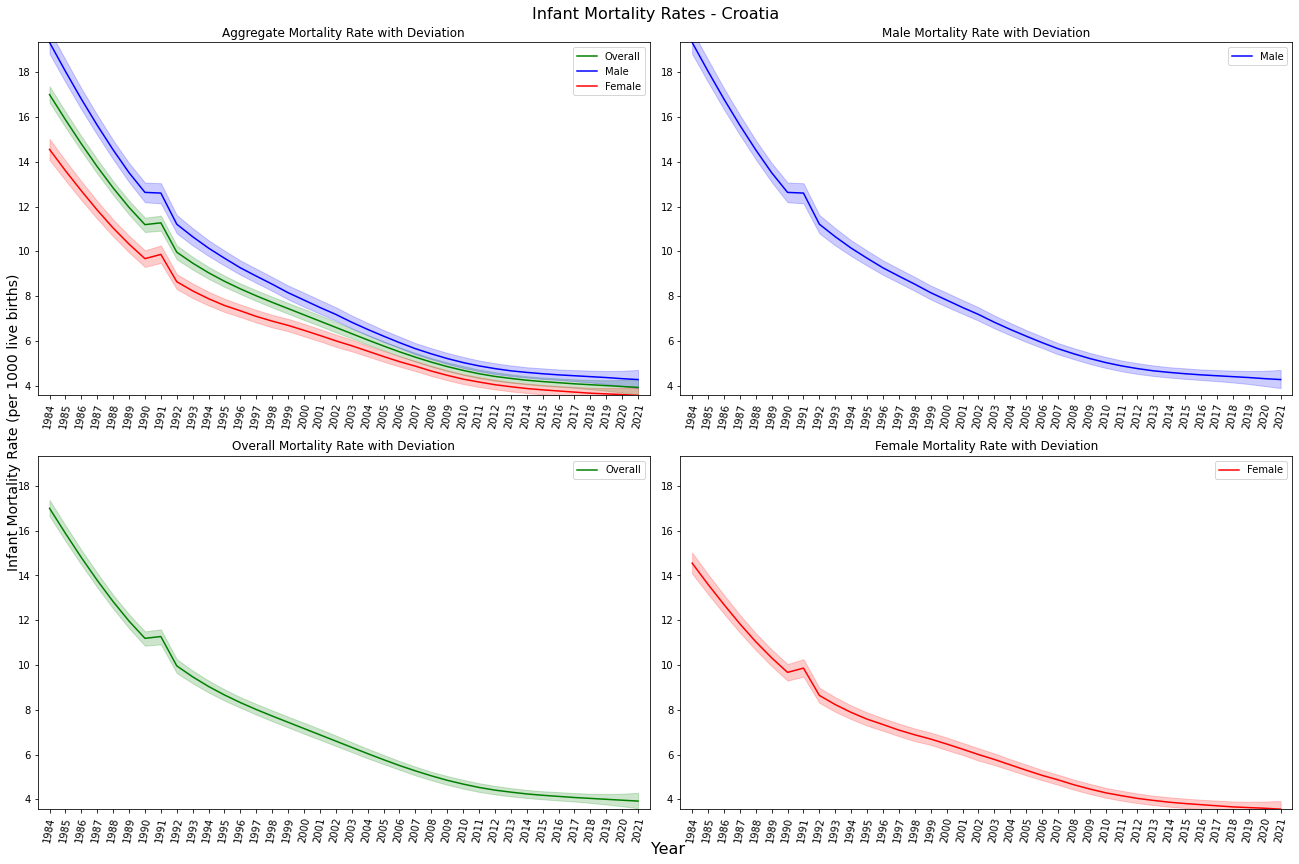

In [27]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(croatia_data['year'])
overall_mortality = croatia_data['imr_both_sexes_per_1000_mean']
male_mortality = croatia_data['imr_male_per_1000_mean']
female_mortality = croatia_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = croatia_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = croatia_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = croatia_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = croatia_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = croatia_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = croatia_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - Croatia', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



<Figure size 432x288 with 0 Axes>

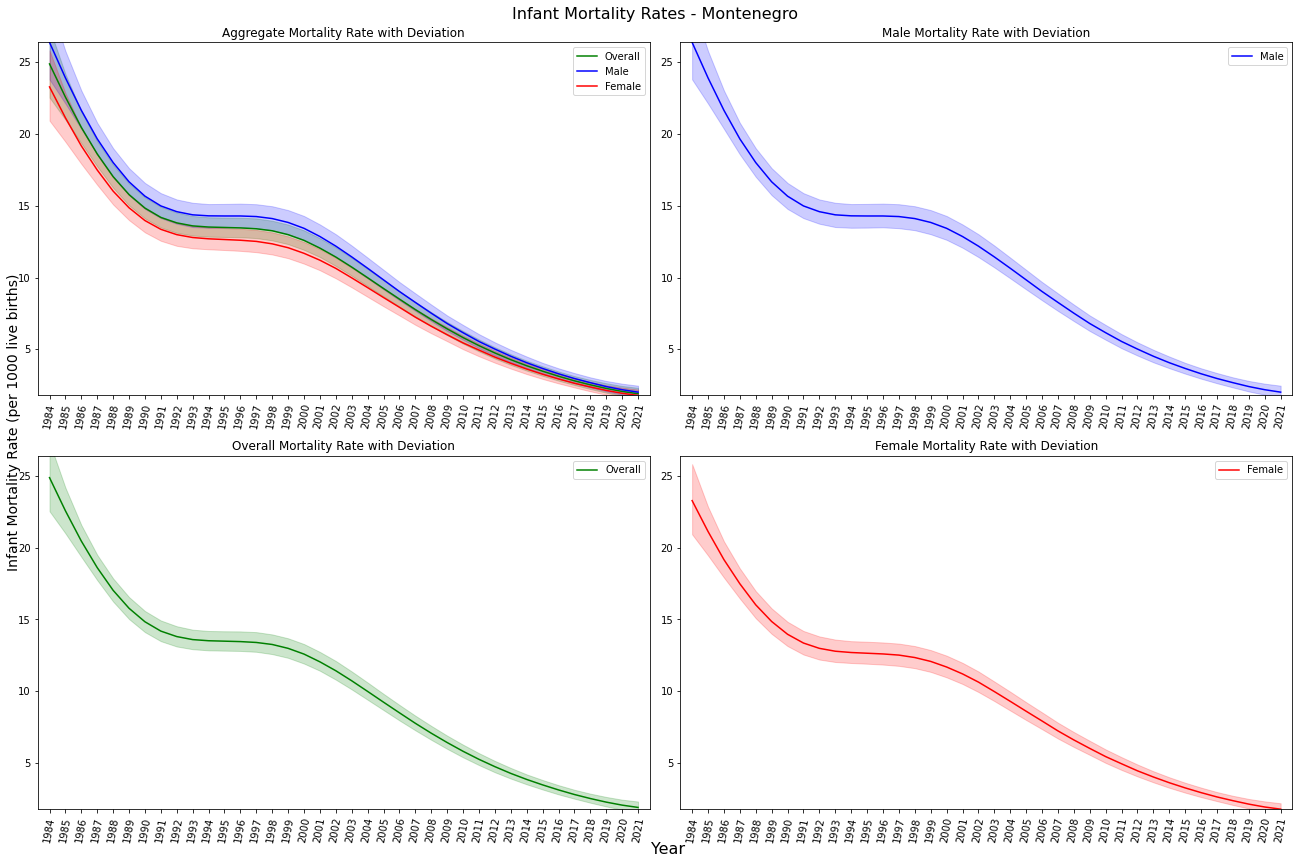

In [28]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(montenegro_data['year'])
overall_mortality = montenegro_data['imr_both_sexes_per_1000_mean']
male_mortality = montenegro_data['imr_male_per_1000_mean']
female_mortality = montenegro_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = montenegro_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = montenegro_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = montenegro_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = montenegro_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = montenegro_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = montenegro_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - Montenegro', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

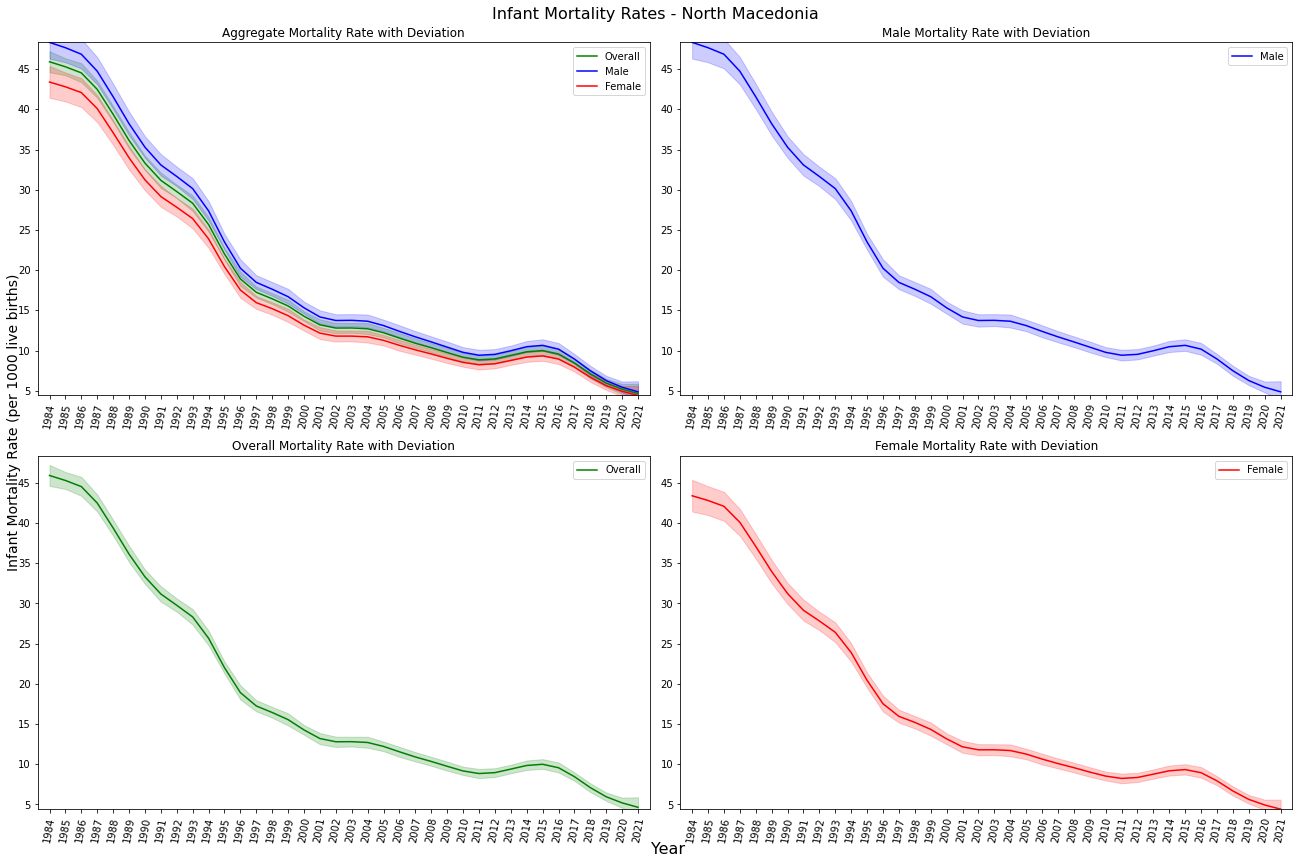

In [29]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(macedonia_data['year'])
overall_mortality = macedonia_data['imr_both_sexes_per_1000_mean']
male_mortality = macedonia_data['imr_male_per_1000_mean']
female_mortality = macedonia_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = macedonia_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = macedonia_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = macedonia_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = macedonia_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = macedonia_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = macedonia_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - North Macedonia', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

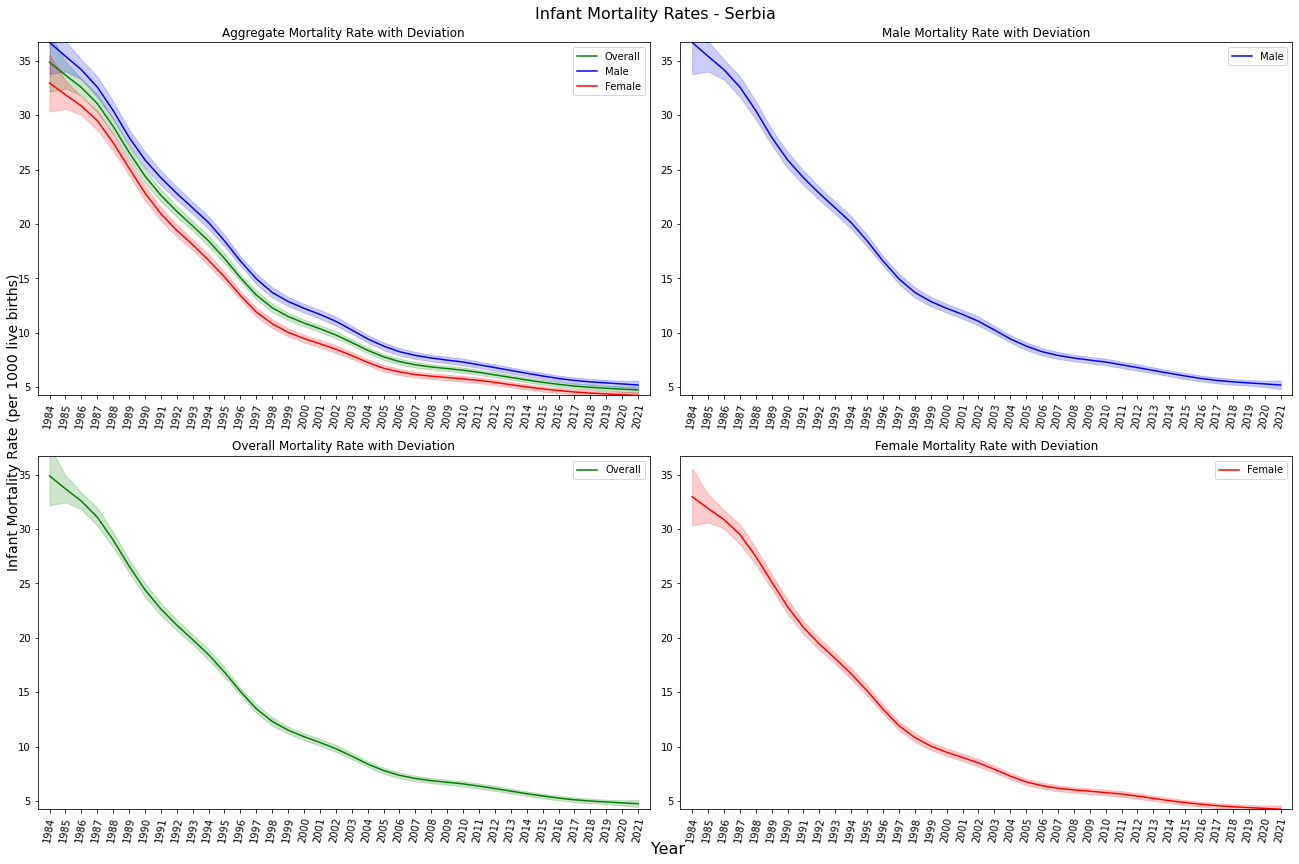

In [30]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(serbia_data['year'])
overall_mortality = serbia_data['imr_both_sexes_per_1000_mean']
male_mortality = serbia_data['imr_male_per_1000_mean']
female_mortality = serbia_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = serbia_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = serbia_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = serbia_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = serbia_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = serbia_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = serbia_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - Serbia', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

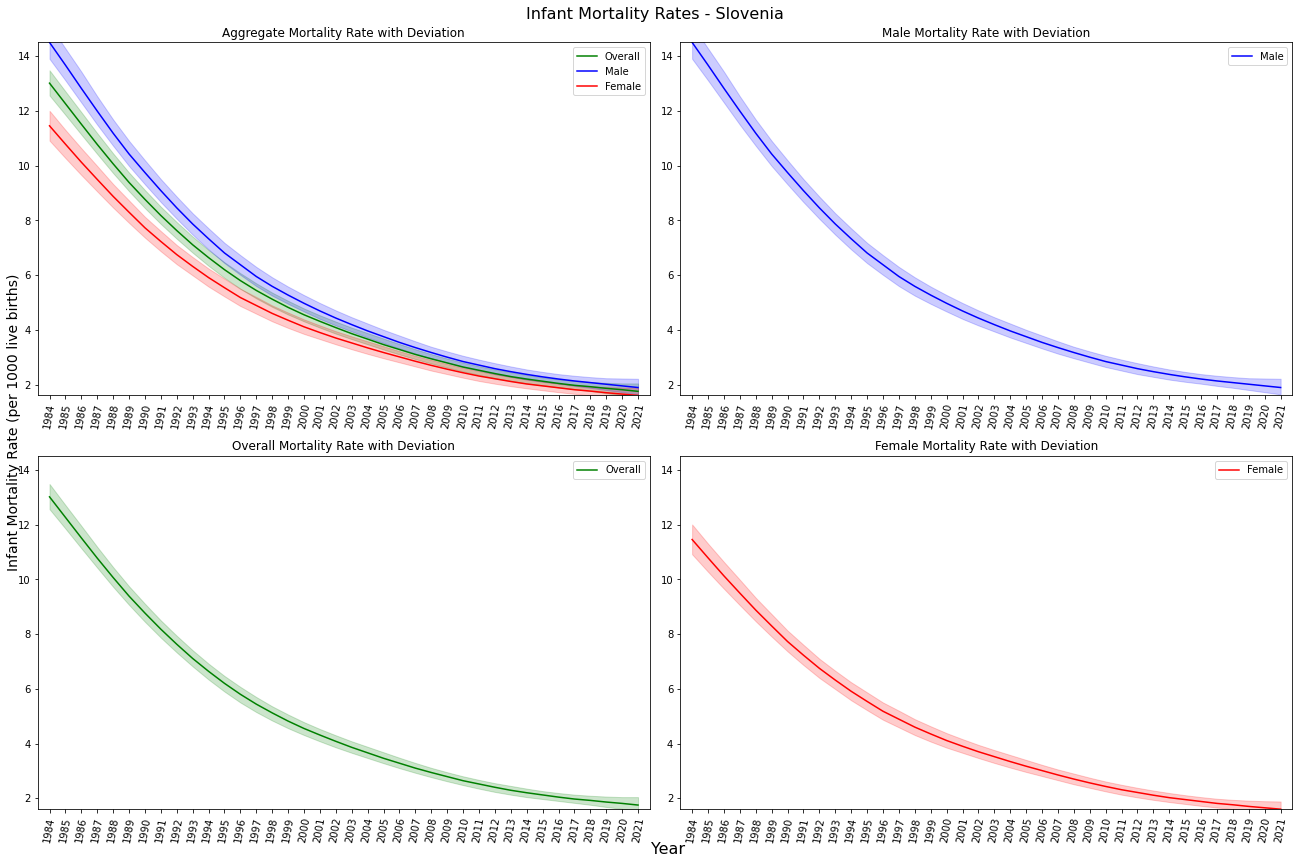

In [31]:
plt.clf()

# Define the years and mortality rates
years = pd.to_numeric(slovenia_data['year'])
overall_mortality = slovenia_data['imr_both_sexes_per_1000_mean']
male_mortality = slovenia_data['imr_male_per_1000_mean']
female_mortality = slovenia_data['imr_female_per_1000_mean']

# Define the deviations for error whiskers
overall_deviation_lower = slovenia_data['imr_both_sexes_per_1000_deviation_lower_bound']
overall_deviation_upper = slovenia_data['imr_both_sexes_per_1000_deviation_upper_bound']
male_deviation_lower = slovenia_data['imr_male_per_1000_deviation_lower_bound']
male_deviation_upper = slovenia_data['imr_male_per_1000_deviation_upper_bound']
female_deviation_lower = slovenia_data['imr_female_per_1000_deviation_lower_bound']
female_deviation_upper = slovenia_data['imr_female_per_1000_deviation_upper_bound']

# Calculate the width for the bars
bar_width = 0.3
year_spacing = 0.02  # Increase the year spacing here

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Calculate the common y-axis range
y_min = min(overall_mortality.min(), male_mortality.min(), female_mortality.min())
y_max = max(overall_mortality.max(), male_mortality.max(), female_mortality.max())

# Plot aggregate mortality rate with deviation
axs[0, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[0, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[0, 0].plot(years, male_mortality, label='Male', color='blue')
axs[0, 0].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 0].plot(years, female_mortality, label='Female', color='red')
axs[0, 0].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[0, 0].set_title('Aggregate Mortality Rate with Deviation')
axs[0, 0].legend()
axs[0, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot male mortality rate 
axs[0, 1].plot(years, male_mortality, label='Male', color='blue')
axs[0, 1].fill_between(years, male_deviation_lower, male_deviation_upper, color='blue', alpha=0.2)
axs[0, 1].set_title('Male Mortality Rate with Deviation')
axs[0, 1].legend()
axs[0, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot overall mortality rate 
axs[1, 0].plot(years, overall_mortality, label='Overall', color='green')
axs[1, 0].fill_between(years, overall_deviation_lower, overall_deviation_upper, color='green', alpha=0.2)
axs[1, 0].set_title('Overall Mortality Rate with Deviation')
axs[1, 0].legend()
axs[1, 0].set_ylim(y_min, y_max)  # Set the y-axis range

# Plot female mortality rate
axs[1, 1].plot(years, female_mortality, label='Female', color='red')
axs[1, 1].fill_between(years, female_deviation_lower, female_deviation_upper, color='red', alpha=0.2)
axs[1, 1].set_title('Female Mortality Rate with Deviation')
axs[1, 1].legend()
axs[1, 1].set_ylim(y_min, y_max)  # Set the y-axis range

# Set x-axis ticks to show all years with additional spacing
for ax in axs.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=80)
    ax.margins(x=year_spacing)

# Set common labels and title with increased text size
fig.text(0.51, 0.00, 'Year', ha='center', fontsize=16)
fig.text(0.00, 0.5, 'Infant Mortality Rate (per 1000 live births)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Infant Mortality Rates - Slovenia', y=0.98, fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Based on the obtained visualizations, male mortality in all Balkan countries slightly exceeds female mortality. Quantitative fluctuations in infant mortality rate for both genders coincide over time intervals.

# 3 Exploring Deviation in Mortality Rates.

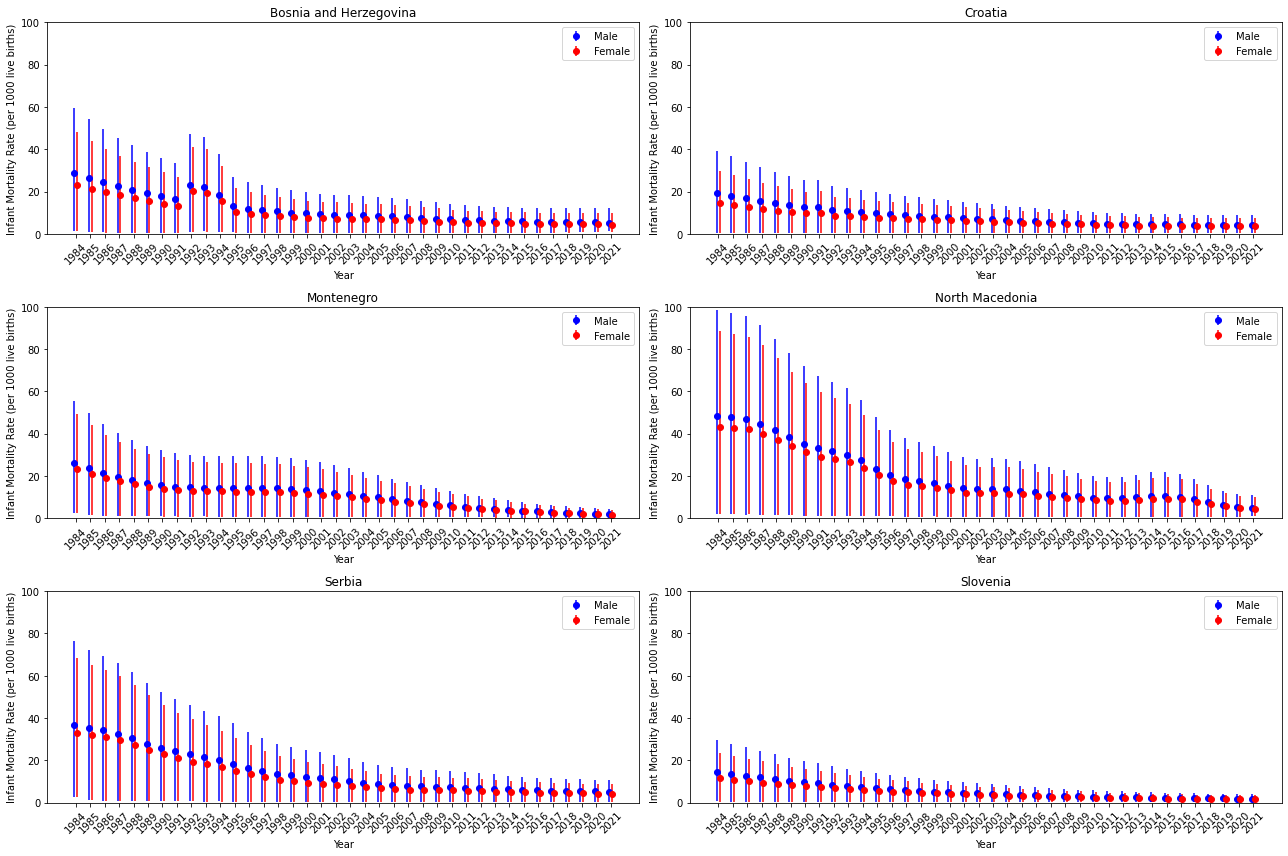

In [32]:
# Create a figure and axes for each row
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Define the years and mortality rates for each country
countries = [bosnia_data, croatia_data, montenegro_data, macedonia_data, serbia_data, slovenia_data]

# Calculate the width for the error bars
error_bar_width = 0.2

# Loop through each country's data and subplot
for i, country_data in enumerate(countries):
    years = pd.to_numeric(country_data['year'])
    male_mortality = country_data['imr_male_per_1000_mean']
    female_mortality = country_data['imr_female_per_1000_mean']

    male_deviation_lower = country_data['imr_male_per_1000_deviation_lower_bound']
    male_deviation_upper = country_data['imr_male_per_1000_deviation_upper_bound']
    female_deviation_lower = country_data['imr_female_per_1000_deviation_lower_bound']
    female_deviation_upper = country_data['imr_female_per_1000_deviation_upper_bound']

    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Plot male mortality rate with error bars
    ax.errorbar(years - error_bar_width / 2, male_mortality, yerr=(male_deviation_lower, male_deviation_upper), fmt='o', label='Male', color='blue')

    # Plot female mortality rate with error bars
    ax.errorbar(years + error_bar_width / 2, female_mortality, yerr=(female_deviation_lower, female_deviation_upper), fmt='o', label='Female', color='red')

    # Set x-axis ticks to show all years
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)

    # Set y-axis limits to the same range for all subplots
    y_min = 0
    y_max = 100
    ax.set_ylim(y_min, y_max)

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Infant Mortality Rate (per 1000 live births)')
    ax.set_title(country_data['country'].iloc[0])  # Assuming 'country' is the column name

    # Add legend
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Data collected in Croatia and Slovenia have the smallest deviations. Data related to North Macedonia shows the greatest variability. Over the time period, all countries exhibit an improvement in data accuracy.